In [3]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
# Customize the default figure size to 8x5 inches
plt.rcParams['figure.figsize'] = [8, 5]
# plt.rcParams stands for 'runtime configuration parameters' in Matplotlib. It is a dictionary-like object
# that stores default settings and styles for plots. These settings will be applied by default to all plots
# created in the current session unless explicitly overridden.

# Customize the default font size to 14 points
plt.rcParams['font.size'] = 14

# Customize the default font weight to bold
plt.rcParams['font.weight'] = 'bold'

# Apply the 'whitegrid' style from Seaborn to all plots in the current session
sns.set_style("whitegrid")

In [22]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.shape

(1338, 7)

**Dataset Information**

- Dataset Shape: (1338, 7)
  - We have 1338 samples and 7 features.

**Variables**

- Target Variable: charges (medical charges)
- Independent Variables: age, sex, bmi, children, smoker, region

**Multiple Linear Regression**

- We use Multiple Linear Regression because there are multiple independent variables.
- The regression equation is:
  h(xi) = b0 + b1 * age + b2 * sex + b3 * bmi + b4 * children + b5 * smoker + b6 * region

**Example for Specific Data Points**

- For the first example (i=1):
  h(x1) = b0 + b1 * 19 + b2 * female + b3 * 27.9 + b4 * 0 + b5 * yes + b6 * southwest
  y1 = 16884.92400

- For the third example (i=3):
  h(x3) = b0 + b1 * 28 + b2 * male + b3 * 33.0 + b4 * 3 + b5 * no + b6 * northwest
  y3 = 4449.46200

**Note**: In Python, indices start from 0.

**Matrix Notation for the First Example**

x1 = [19, female, 27.9, 0, yes, southwest]

**Summary**

- 1338 samples with 7 features.
- Target variable: charges.
- Independent variables: age, sex, bmi, children, smoker, region.
- Use Multiple Linear Regression for prediction.


## Matrix Formulation

In general we can write above vector as $$ \mathbf{ x_{ij}} = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{in}} \end{smallmatrix} \right)$$

Now we combine all aviable individual vector into single input matrix of size $(m,n)$ and denoted it by $\mathbf{X}$ input matrix, which consist of all training exaples,
$$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$

We represent parameter of function and dependent variable in vactor form as  
$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$

So we represent hypothesis function in vectorize form $$\mathbf{ h_\theta{(x)} = X\theta}$$.



Text(0.5, 1.0, 'Charge Vs BMI')

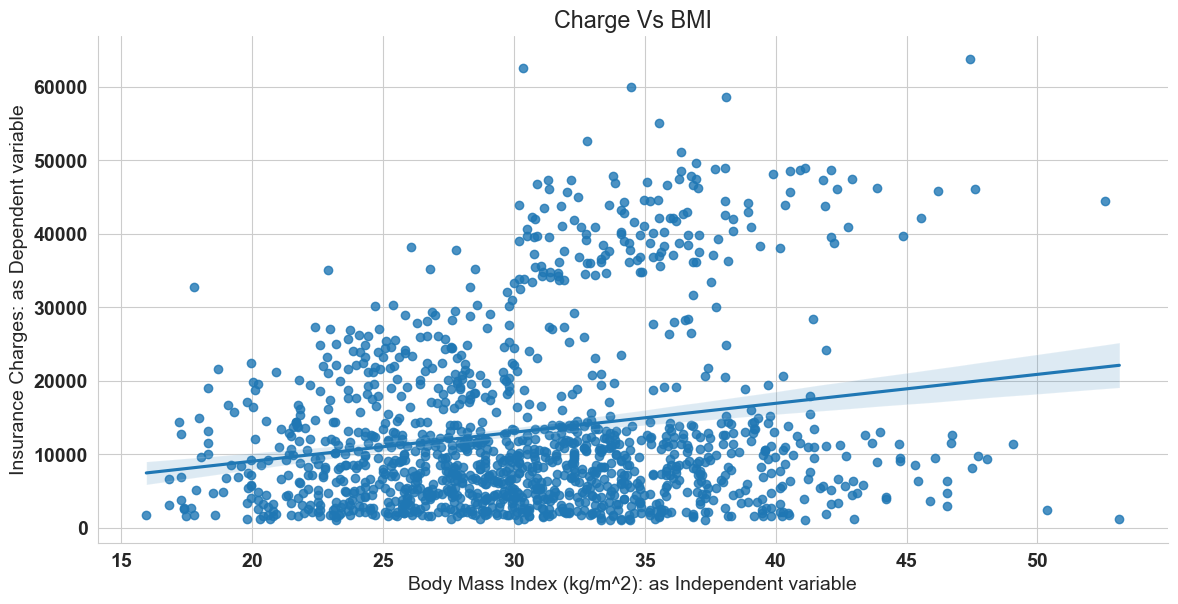

In [24]:
# For our visualization purpose, we'll fit a line using Seaborn library 
# only for bmi as independent variable and charges as dependent variable.

sns.lmplot(x='bmi', y='charges', data=df, aspect=2, height=6)

# Label for x-axis
plt.xlabel('Body Mass Index (kg/m^2): as Independent variable')

# Label for y-axis
plt.ylabel('Insurance Charges: as Dependent variable')


# Title of the plot
plt.title('Charge Vs BMI')


## Normal Equation
The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of $\mathbf{J(\theta)}$ with respect to $\theta$ and equate to $0$. The derivative of function is nothing but if a small change in input what would be the change in output of function.
 $$\mathbf{min_{\theta_0,\theta_1..\theta_n} J({\theta_0,\theta_1..\theta_n})}$$
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} =0}$$ 
 where $\mathbf{j = 0,1,2,....n}$
 
 Now we will apply partial derivative of our cost function,
 $$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} = \frac{\partial }{\partial \theta} \frac{1}{m}(X\theta - y)^T(X\theta - y) }$$
 I will throw $\mathbf{\frac {1}{m}}$ part away since we are going to compare a derivative to $0$. And solve $\mathbf{J(\theta)}$,  
 
 $$\mathbf{J(\theta) = (X\theta -y)^T(X\theta - y)}$$
 $$\mathbf{= (X\theta)^T - y^T)(X\theta -y)}$$   
 $$\mathbf{= (\theta^T X^T - y^T)(X\theta - y)}$$
 $$\mathbf{= \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y}$$
 $$\mathbf{ = \theta^T X^T X \theta  - 2\theta^T X^T y + y^T y}$$

Here $\mathbf{y^T_{(1,m)} X_{(m,n+1)} \theta_{(n+1,1)} = \theta^T_{(1,n+1)} X^T_{(n+1,m)} y_{(m,1)}}$ because unit vector.

$$\mathbf{\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} (\theta^T X^T X \theta  - 2\theta^T X^T y + y^T y )}$$
$$\mathbf{ = X^T X \frac {\partial \theta^T \theta}{\partial\theta} - 2 X^T y \frac{\partial \theta^T}{\partial\theta} + \frac {\partial y^T y}{\partial\theta}}$$
Partial derivative $\mathbf{\frac {\partial x^2}{\partial x} = 2x}$, $\mathbf{\frac {\partial kx^2}{\partial x} = kx}$,
$\mathbf{\frac {\partial Constact}{\partial x} = 0}$

$$\mathbf{\frac{\partial J(\theta)}{\partial\theta} = X^T X 2\theta - 2X^T y +0}$$
$$\mathbf{ 0 = 2X^T X \theta - 2X^T y}$$
$$\mathbf{ X^T X \theta = X^T }$$
$$\mathbf{ \theta = (X^TX)^{-1} X^Ty }$$
this the normal equation for linear regression